# Neural Nets Intro

In [2]:
import numpy as np
from numpy.random import randn, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## The need for neural networks
**Why nnets?**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
seed(1643)
n = 100
x = np.linspace(0, 3, n).reshape(-1, 1)
noise = randn(n, 1)
p1 = np.poly1d([3, 1])
p2 = np.poly1d([-0.8, 0.1, 1])

### Linear Regression
Underlying model: $y = 3x + 1$

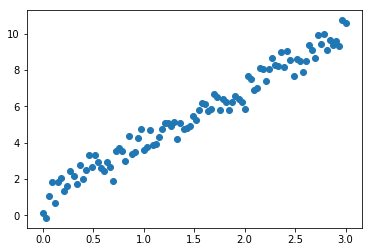

In [8]:
y = p1(x) + 0.5 * noise
plt.scatter(x, y)
plt.savefig("./images/model1.pdf")
plt.show()

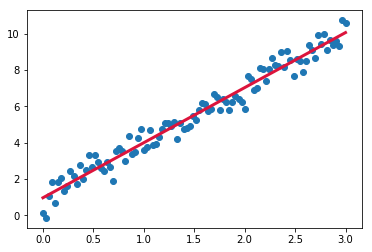

In [7]:
linm1 = LinearRegression()
linm1.fit(x, y)

plt.scatter(x, y)
plt.plot(x, linm1.predict(x), c="crimson", linewidth=3)
plt.savefig("./images/model1_fit.pdf")
plt.show()

### Linear Regression 2
Underlying model: $y = -0.8x^2 + x + 1$

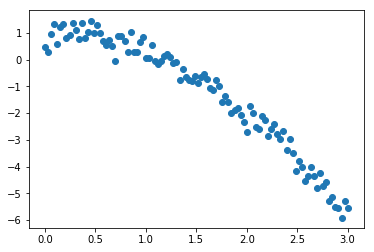

In [9]:
y = p2(x) + 0.3* noise
plt.scatter(x, y)
plt.savefig("./images/model2.pdf")
plt.show()

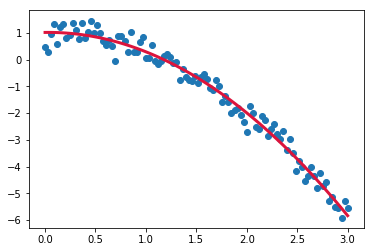

In [10]:
linm2 = LinearRegression()
p = PolynomialFeatures(degree=2)
x2 = p.fit_transform(x)
linm2.fit(x2, y)

plt.scatter(x, y)
plt.plot(x, linm2.predict(x2), c="crimson", linewidth=3)
plt.savefig("./images/model2_fit.pdf")
plt.show()

## Classification Problem

In [17]:
from pydataset import data
import seaborn as sns

In [13]:
iris = data("iris")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [14]:
iris["area_sepal"] = iris["Sepal.Length"] * iris["Sepal.Width"]
iris["area_petal"] = iris["Petal.Length"] * iris["Petal.Width"]

In [15]:
train, test  = train_test_split(iris[["Species", "area_sepal", "area_petal"]], test_size=0.2)

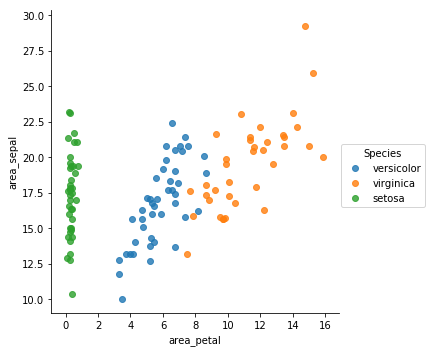

In [18]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species", data=train, fit_reg=False)
plt.show()

In [19]:
train_x, train_y = train.drop("Species", axis=1).values, train["Species"].values

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [28]:
lreg = LogisticRegression()
lreg.fit(train_x, train_y)

knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
prediction = knn.predict(test.drop("Species", axis=1).values)
test_y = test.Species

In [30]:
test["Species_pred"] = prediction

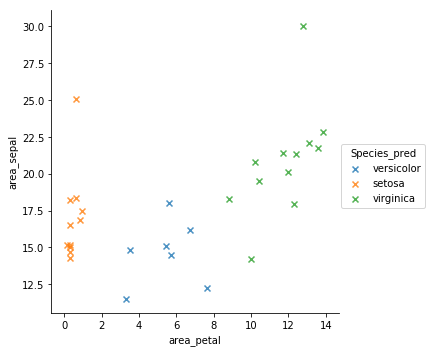

In [34]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species_pred", fit_reg=False, data=test, markers="x")
plt.savefig("./images/knn_fit.pdf")
plt.show()

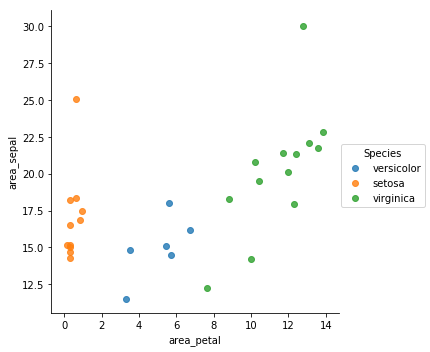

In [35]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species", fit_reg=False, data=test, markers="o")
plt.savefig("./images/knn_org.pdf")
plt.show()

In [33]:
test.query("Species_pred != Species")

,Species,area_sepal,area_petal,Species_pred
107,virginica,12.25,7.65,versicolor


## Another example

In [20]:
import pickle
with open("inputs.pkl", "rb") as f:
    inputs = pickle.load(f)

import pickle
with open("targets.pkl", "rb") as f:
    targets = pickle.load(f)
    targets = [1 if t[0] == 1 else 0 for t in targets]

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(inputs, targets, test_size=0.2)

In [23]:
ycol = ["crimson" if y == 1 else "teal" for y in ytrain]

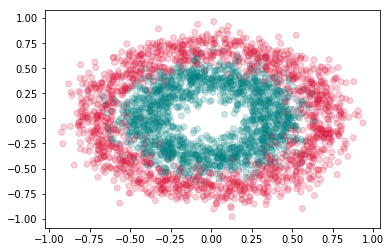

In [86]:
plt.scatter(*xtrain.T, c=ycol, alpha=0.2)
plt.savefig("./images/knn_classify.pdf")
plt.show()

### Logistic Regression Model

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [227]:
def correct_incorrect_map(ytrue, ypredicted):
    correct = np.where(ypred == ytest)[0]
    incorrect = np.where(ypred != ytest)[0]
    return correct, incorrect

In [223]:
lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)
ypred = lreg.predict(xtest)

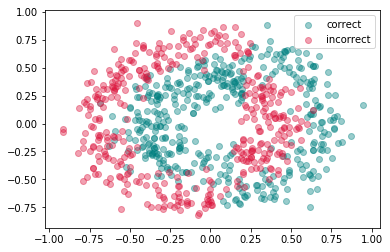

In [228]:
correct, incorrect = correct_incorrect_map(ytest, ypred)

plt.scatter(*xtest[correct,:].T, color="teal", alpha=0.4, label="correct")
plt.scatter(*xtest[incorrect,:].T, color="crimson", alpha=0.4, label="incorrect")
plt.legend()
plt.savefig("./images/knn_pred_lreg.pdf")
plt.show()

In [226]:
# Accuracy over the training dataset
accuracy_score(ytest, ypred)

0.52124999999999999

#### How to correctly predict this dataset?

In [229]:
from numpy import pi, sqrt, arctan

def radius(x, y): return sqrt(x ** 2 + y ** 2)

def theta(x, y):
    """
    Compute the theta in polar coordinates given x, y in
    cartesian coordinates
    """
    theta_prime = arctan(abs(y / x))
    qx = 1 if x < 0 else 0
    qy = -1 if y < 0 else 1
    q = qx + qy
    if q == -1:
        theta = theta_prime
    elif q == 0:
        theta = pi - theta_prime
    elif q == 1:
        theta = pi + theta_prime
    if q == 2:
        theta = 2 * pi - theta_prime
    
    return theta

def make_polar(X):
    """
    Transform an R(nx2) matrix expressed
    as points in cartesian coordinates into
    polar coordinates    
    """
    R = []
    T = []
    for row in X:
        x, y = row
        R.append(radius(x, y))
        T.append(theta(x, y))
    return np.c_[R, T]

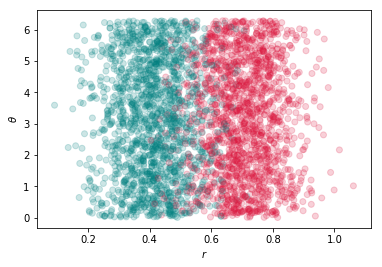

In [256]:
colors = ["crimson" if c==1 else "teal" for c in ytrain]
plt.scatter(*make_polar(xtrain).T, color=colors, alpha=0.2)
plt.xlabel("$r$")
plt.ylabel(r"$\theta$")
plt.savefig("./images/knn_classify_polar.pdf")
plt.show()

In [248]:
xtrain_polar = make_polar(xtrain)
xtest_polar = make_polar(xtest)

lreg.fit(xtrain_polar, ytrain)
ypred_polar = lreg.predict(xtest_polar)

correct, incorrect = correct_incorrect_map(ytest, ypred_polar)

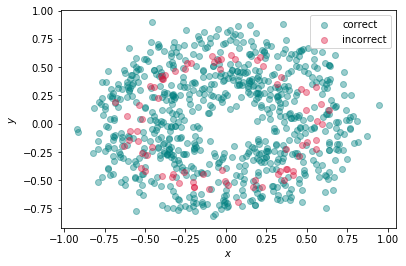

In [262]:
plt.scatter(*xtest[correct,:].T, color="teal", alpha=0.4, label="correct")
plt.scatter(*xtest[incorrect,:].T, color="crimson", alpha=0.4, label="incorrect")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("./images/knn_pred_lreg_polar.pdf")
plt.show()

In [257]:
accuracy_score(ytest, ypred_polar)

0.92125000000000001

### KNN Model

In [258]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

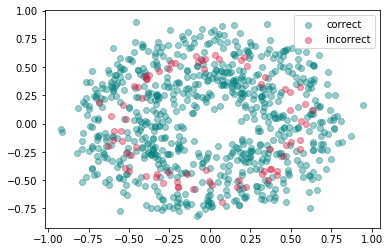

In [259]:
correct = np.where(ypred == ytest)[0]
incorrect = np.where(ypred != ytest)[0]

plt.scatter(*xtest[correct,:].T, color="teal", alpha=0.4, label="correct")
plt.scatter(*xtest[incorrect,:].T, color="crimson", alpha=0.4, label="incorrect")
plt.legend()
plt.savefig("./images/knn_pred_knn.pdf")
plt.show()

In [261]:
accuracy_score(ytest, ypred)

0.90625

# Neural Networks 

In [113]:
from sklearn.datasets import fetch_mldata

In [115]:
mnist = fetch_mldata("MNIST original")

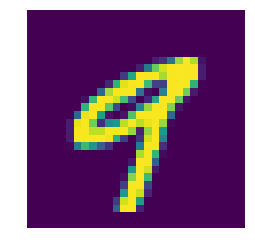

In [263]:
plt.imshow(mnist["data"][-3].reshape(28,28))
plt.axis("off")
plt.savefig(f"./images/MNIST1.pdf", bbox_inches="tight")
plt.show()

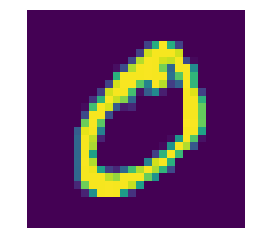

In [264]:
plt.imshow(mnist["data"][0].reshape(28,28))
plt.axis("off")
plt.savefig(f"./images/MNIST2.pdf", bbox_inches="tight")
plt.show()